# Homework 2
Parsa Heidary Moghadam,
Daniel Losada,
Vahid Ghanbari Zadeh,

- steam_reviews.csv should be in the same folder of homework2.ipynb file
- https://github.com/lucamaiano/ADM/blob/master/2021/Homework_2/README.md

In [501]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import ttest_ind, f_oneway

## [RQ1]

After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.

### Answer1
---


For the first step we are trying to understand the data. Therefore, we will fetch columns and some rows of the data and fetch some information from them such as their shape and ...

In [3]:
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

dataset = pd.read_csv('./steam_reviews.csv',
                      header='infer',
                      nrows=2000000,
                      parse_dates=['timestamp_created','timestamp_updated', 'author.last_played'],
                      date_parser=dateparse)
dataset.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


In [4]:
dataset.tail()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
1999995,1999996,381210,Dead by Daylight,46559668,russian,Dead by daylight это когда:\n1)Обе стороны ною...,2018-11-23 11:30:49,2018-11-23 11:30:49,True,2,...,True,False,False,76561198354639547,29,1,43119.0,0.0,31005.0,2020-09-09 15:49:25
1999996,1999997,381210,Dead by Daylight,46559372,japanese,非対称対戦です\n楽しいです\nだんだんと上手になっていくのは楽しいです\nでもやはり人との...,2018-11-23 11:29:06,2018-11-23 11:29:06,True,0,...,False,False,False,76561198015995067,120,1,81176.0,0.0,45680.0,2020-12-29 03:25:25
1999997,1999998,381210,Dead by Daylight,46559194,russian,Найс игра.,2018-11-23 11:27:55,2018-11-23 11:27:55,True,1,...,True,False,False,76561198451140399,38,3,10037.0,0.0,4746.0,2020-04-06 16:34:06
1999998,1999999,381210,Dead by Daylight,46559119,thai,เป็นเกมที่สุดยอดที่สุดเเล้วครับ,2018-11-23 11:27:23,2019-11-27 11:52:51,True,0,...,True,False,False,76561198085660348,117,4,38910.0,79.0,34692.0,2021-01-12 17:20:45
1999999,2000000,381210,Dead by Daylight,46559035,brazilian,amo muito <3,2018-11-23 11:26:46,2018-11-23 11:26:46,True,1,...,True,False,False,76561198192456735,251,16,2055.0,0.0,1594.0,2020-09-13 01:35:56


In [5]:
rows, cols = dataset.shape
print("There are {0} user reviews -- each review contains {1} columns of information".format(rows, cols))

There are 2000000 user reviews -- each review contains 23 columns of information


In [376]:
cols = dataset.columns
cols

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

Each column describes:
- app_id: the game id
- app_name: the name for the game
- review_id: the id of the reviewer
- language: language of the review
- review: review text
- timestamp_created: Review creation timestamp
- timestamp_updated: Review latest update timestamp
- recommended: Whether review recommends the app
- votes_helpful: Number of "helpful" votes for review

In [378]:
dataset.dtypes

Unnamed: 0                                 int64
app_id                                     int64
app_name                                  object
review_id                                  int64
language                                  object
timestamp_created                 datetime64[ns]
timestamp_updated                 datetime64[ns]
recommended                                 bool
votes_helpful                              int64
votes_funny                                int64
weighted_vote_score                      float64
comment_count                              int64
steam_purchase                              bool
received_for_free                           bool
written_during_early_access                 bool
author.steamid                             int64
author.num_games_owned                     int64
author.num_reviews                         int64
author.playtime_forever                  float64
author.playtime_last_two_weeks           float64
author.playtime_at_r

In [7]:
dataset.describe()

,Unnamed: 0,app_id,review_id,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.996683e+06
mean,1.000000e+06,1.213136e+05,4.736107e+07,1.202951e+00,1.352921e+05,1.516370e-01,1.134790e-01,7.656120e+16,1.134849e+02,1.009040e+01,2.024508e+04,1.386791e+02,1.213795e+04
std,5.773507e+05,1.568375e+05,2.332649e+07,2.332894e+01,2.410507e+07,2.370955e-01,1.592869e+00,3.165412e+08,2.344387e+02,3.230297e+01,5.077602e+04,6.878205e+02,3.517027e+04
min,0.000000e+00,7.000000e+01,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.000008e+05,4.000000e+03,2.709848e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.300000e+01,2.000000e+00,1.587000e+03,0.000000e+00,6.860000e+02
50%,1.000000e+06,4.000000e+03,5.174743e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,5.600000e+01,4.000000e+00,6.088000e+03,0.000000e+00,2.646000e+03
75%,1.500000e+06,2.920300e+05,6.680106e+07,1.000000e+00,0.000000e+00,4.761905e-01,0.000000e+00,7.656120e+16,1.260000e+02,1.000000e+01,1.718700e+04,0.000000e+00,9.124000e+03
max,2.000000e+06,3.812100e+05,8.521823e+07,9.132000e+03,4.294967e+09,9.903845e-01,6.370000e+02,7.656120e+16,2.096900e+04,5.236000e+03,3.470649e+06,2.201000e+04,3.228103e+06


In [8]:
dataset.nunique()

Unnamed: 0                        2000000
app_id                                  9
app_name                                9
review_id                         2000000
language                               28
review                            1562822
timestamp_created                 1967089
timestamp_updated                 1964007
recommended                             2
votes_helpful                         821
votes_funny                           695
weighted_vote_score                 97000
comment_count                         153
steam_purchase                          2
received_for_free                       2
written_during_early_access             1
author.steamid                    1819576
author.num_games_owned               3854
author.num_reviews                    764
author.playtime_forever            158434
author.playtime_last_two_weeks       9282
author.playtime_at_review          121602
author.last_played                1908775
dtype: int64

As we can see from the uniqueness of each column's values, we can infer how many categories can be taken for each column

In [9]:
dataset.isnull().sum()

Unnamed: 0                           0
app_id                               0
app_name                             0
review_id                            0
language                             0
review                            3141
timestamp_created                    0
timestamp_updated                    0
recommended                          0
votes_helpful                        0
votes_funny                          0
weighted_vote_score                  0
comment_count                        0
steam_purchase                       0
received_for_free                    0
written_during_early_access          0
author.steamid                       0
author.num_games_owned               0
author.num_reviews                   0
author.playtime_forever              0
author.playtime_last_two_weeks       0
author.playtime_at_review         3317
author.last_played                   0
dtype: int64

As we can see the "review" and "playtime_at_review" columns have null values. But, since the review column contians the reviews, we don't necessarily need it. Therefore, we can just remove "review" and clean "author.playtime_at_review" (by replacing NaN values with zero) columns. Note: we don't eliminate these rows because they are not critical to be around.

In [10]:
dataset = dataset.drop(["review",], axis=1)
dataset.head()

,Unnamed: 0,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


In [11]:
dataset['author.playtime_at_review'].replace(np.nan, 0)
dataset.head()

,Unnamed: 0,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


In [12]:
dataset.isnull().sum()

Unnamed: 0                           0
app_id                               0
app_name                             0
review_id                            0
language                             0
timestamp_created                    0
timestamp_updated                    0
recommended                          0
votes_helpful                        0
votes_funny                          0
weighted_vote_score                  0
comment_count                        0
steam_purchase                       0
received_for_free                    0
written_during_early_access          0
author.steamid                       0
author.num_games_owned               0
author.num_reviews                   0
author.playtime_forever              0
author.playtime_last_two_weeks       0
author.playtime_at_review         3317
author.last_played                   0
dtype: int64

For further cleaning we will eliminate outliers.

<AxesSubplot:>

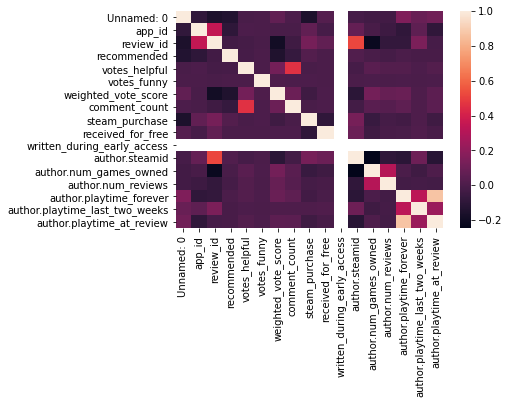

In [13]:
corr = dataset.corr()
sns.heatmap(corr)

The heatmap above shows how each column value changes with regards to other columns.

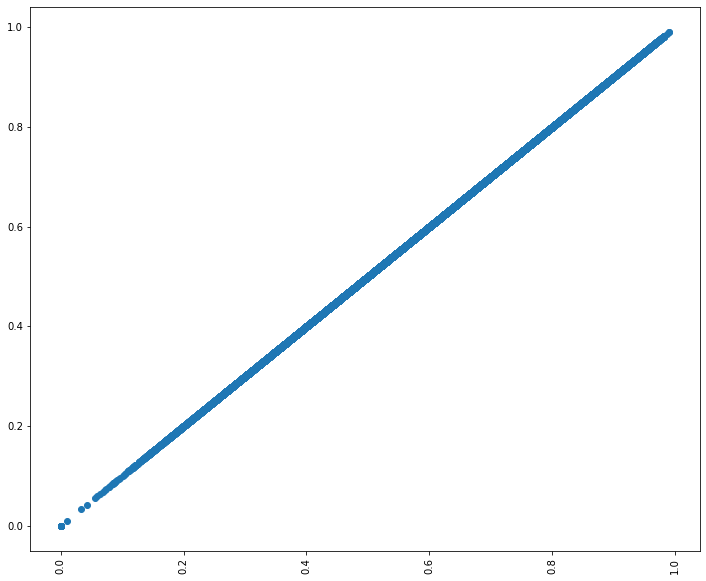

In [270]:
plt.figure(figsize=(12,10))
count = dataset['language'].value_counts()
plt.scatter(dataset['weighted_vote_score'], dataset['weighted_vote_score'])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Parsa33033\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parsa33033\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parsa33033\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


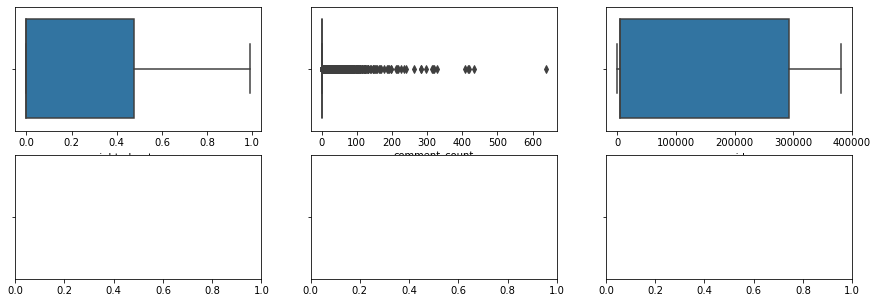

In [382]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
sns.boxplot(dataset['weighted_vote_score'], ax=ax[0,0])
sns.boxplot(dataset['comment_count'], ax=ax[0,1])
sns.boxplot(dataset['app_id'], ax=ax[0,2])
plt.show()

#### Extract knowledge by visualizing the data

As we can see from the data

##  [RQ2] 

 Let's explore the dataset by finding simple insights into the reviews.

    Plot the number of reviews for each application in descending order.
    What applications have the best Weighted Vote Score?
    Which applications have the most and the least recommendations?
    How many of these applications were purchased, and how many were given for free?



### Answer 2
---


#### number of reviews for each application in descending order

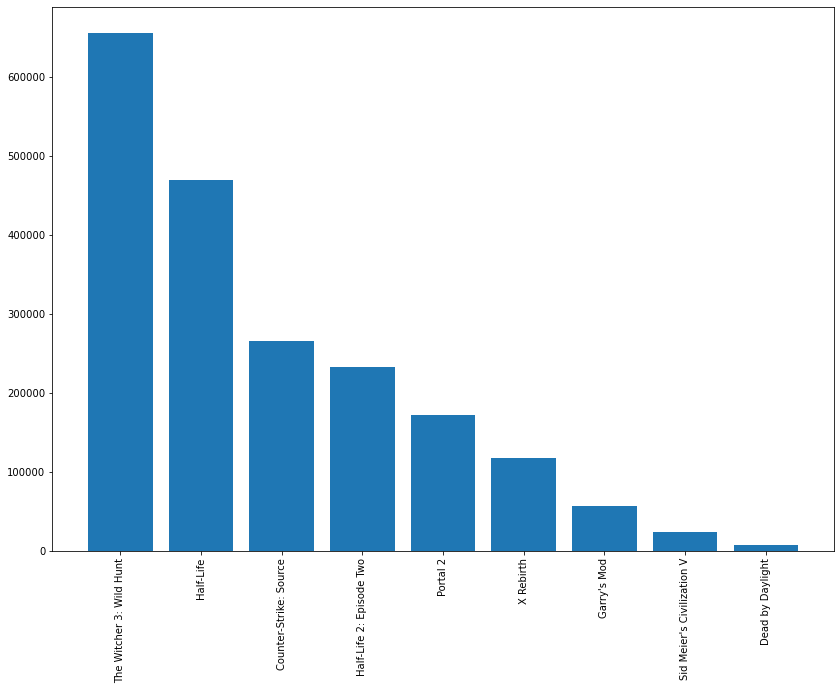

In [202]:
plt.figure(figsize=(14,10))
plt.bar(dataset.app_name.unique(), dataset.app_name.value_counts())
plt.xticks(rotation='vertical')
plt.show()

In [421]:
top_ten_weighted_vote_score = dataset[dataset["weighted_vote_score"] > 0].sort_values(by = "weighted_vote_score")[-10:]
print("Application which have the top ten best weighted vote score:")
for i in top_ten_weighted_vote_score['app_name'].unique():
    print("  > " + i)

Application which have the top ten best weighted vote score:
  > Sid Meier's Civilization V
  > The Witcher 3: Wild Hunt


In [474]:
recommended_apps = dataset.groupby(["app_name", "recommended"]).size().reset_index()
recommended_apps = recommended_apps[recommended_apps["recommended"] == True]
recommended_apps = recommended_apps.sort_values(recommended_apps.columns[2], ascending = False)
recommended_apps

,app_name,recommended,0
5,Garry's Mod,True,632558
15,The Witcher 3: Wild Hunt,True,460252
11,Portal 2,True,229470
3,Dead by Daylight,True,227356
13,Sid Meier's Civilization V,True,164797
1,Counter-Strike: Source,True,113430
7,Half-Life,True,55312
9,Half-Life 2: Episode Two,True,22704
17,X Rebirth,True,2970


In [471]:
print("'{}' had the most recommendations by {} and '{}' had the least recommendation by {}"
      .format(recommended_apps.iloc[0, 0], recommended_apps.iloc[0, -1], recommended_apps.iloc[-1, 0], recommended_apps.iloc[-1, -1]))

'Garry's Mod' had the most recommendations by 632558 and 'X Rebirth' had the least recommendation by 2970


In [483]:
purchased_apps = dataset.groupby(["app_name", "steam_purchase"]).size().reset_index()
purchased_apps

,app_name,steam_purchase,0
0,Counter-Strike: Source,False,43264
1,Counter-Strike: Source,True,74817
2,Dead by Daylight,False,71328
3,Dead by Daylight,True,194118
4,Garry's Mod,False,104274
5,Garry's Mod,True,551250
6,Half-Life,False,13445
7,Half-Life,True,43875
8,Half-Life 2: Episode Two,False,5962
9,Half-Life 2: Episode Two,True,17538


## [RQ3]

*Now it's important to understand the preferred time to do reviews.*
- What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
- Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
- Use the function that you created in the previous literal to plot the number of reviews between the following time intervals: 
    
| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

### Answer 3
---


In [360]:
dataset['timestamp_created'] = pd.to_datetime(dataset['timestamp_created'])
t = dataset['timestamp_created'].dt.time
# t = t.apply(lambda x: x.strftime("%H:%M:%S"))
t_count = t.value_counts()
t_count

15:54:53    56
18:12:37    54
21:08:22    52
15:00:44    52
19:39:49    52
            ..
07:19:46     5
03:30:54     5
04:28:48     5
05:31:53     4
05:27:13     4
Name: timestamp_created, Length: 86400, dtype: int64

As we can see in the count of each of the unique timestamp values of the created reviews, most reviews happened at "15:54:53".

In [369]:
l = ["06:00:00",
    "11:00:00",
    "14:00:00",
    "17:00:00",
    "20:00:00",
    "00:00:00",
    "03:00:00"]
x = []
for i in l:
    x.append(datetime.strptime(i, "%H:%M:%S").time())
print(t)
c = list(dict(t_count).values())
out = pd.cut(c, bins=np.linspace(0,23,24), include_lowest=True)
out.plot.bar()

# x = dict(t_count)
# t_keys = np.array(list(x.keys()))
# t_keys = np.linspace(0, len(t_keys), len(t_keys))
# t_vals = np.array(list(x.values()))
# print(t_vals)
# plt.figure(figsize=(18, 16))
# plt.bar(t_keys, t_vals)
# plt.xticks(rotation='vertical')
# plt.show()

0          06:00:29
1          05:50:30
2          05:46:40
3          05:32:50
4          05:23:47
             ...   
1999995    11:30:49
1999996    11:29:06
1999997    11:27:55
1999998    11:27:23
1999999    11:26:46
Name: timestamp_created, Length: 2000000, dtype: object


AttributeError: 'Categorical' object has no attribute 'plot'

In [265]:
def plotIntervalNum(timestamp_col, l):
    timestamp_col = timestamp_col.dt.time
    timestamp_col_count = timestamp_col.value_counts()
    timestamp_col_count = timestamp_col_count.sort_index()
    intervals = []
    counts = []
    for i in l:
        start, end = i
        intervals.append(start + "-" + end)
        start = datetime.strptime(start, "%H:%M:%S").time()
        end = datetime.strptime(end, "%H:%M:%S").time()
        c = 0
        for time, count in dict(timestamp_col_count).items():
            if start <= time < end:
                c += count
            elif time >= end:
                break
        counts.append(c)
    plt.figure()
    plt.bar(intervals, counts)
    plt.xticks(rotation='vertical')
    plt.show()
    

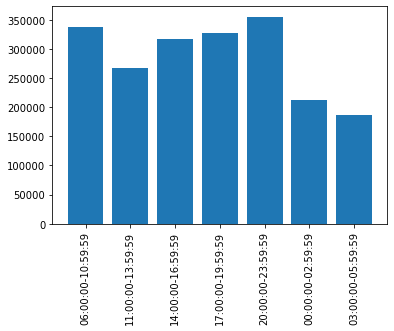

In [346]:
l = [["06:00:00","10:59:59"],
    ["11:00:00","13:59:59"],
    ["14:00:00","16:59:59"],
    ["17:00:00","19:59:59"],
    ["20:00:00","23:59:59"],
    ["00:00:00","02:59:59"],
    ["03:00:00","05:59:59"]]

plotIntervalNum(dataset['timestamp_created'], l)

## [**RQ4**] 

*As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.*
- What are the top 3 languages used to review applications?
- Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.
- Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?
- Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

### Answer 4
---


In [319]:
top_three_langs = dataset['language'].value_counts()[:3]
top_three_langs

english     876981
russian     355410
schinese    172649
Name: language, dtype: int64

In [320]:
top_three_langs = list(dict(top_three_langs).keys())
top_three_langs

['english', 'russian', 'schinese']

In [321]:
def fetch_dataset_with_Lang(dataset, langList):
    return dataset[dataset['language'].isin(langList)]

In [384]:
top_three_langs_records = fetch_dataset_with_Lang(dataset, top_three_langs)
funny_top_three_langs_records = top_three_langs_records[top_three_langs_records['votes_funny'] == True]
print("{:.2f}% of the data contain {}, {}, and {} languages which are funny".format(len(funny_top_three_langs_records)/len(dataset)*100, top_three_langs[0], top_three_langs[1], top_three_langs[2]))

5.45% of the data contain english, russian, and schinese languages which are funny


In [383]:
helpful_top_three_langs_records = top_three_langs_records[top_three_langs_records['votes_helpful'] == True]
print("{:.2f}% of the data contain {}, {}, and {} languages which are helpful".format(len(helpful_top_three_langs_records)/len(dataset)*100, top_three_langs[0], top_three_langs[1], top_three_langs[2]))

12.45% of the data contain english, russian, and schinese languages which are helpful


## [**RQ5**] 

*The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.*
- Plot the top 10 most popular reviewers and the number of reviews.
- What applications did the most popular author review? 
- How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
- How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

### Answer 5
---


## [**RQ6**]

*It's time to get information from the updates that a user does to his reviews.*
- What is the average time (days and minutes) a user lets pass before he updates a review?
- Plot the top 3 authors that usually update their reviews.

### Answer 6
---


## [**RQ7**] 

*Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.*
- What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?
- What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?
- Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

### Answer 7
---


## [**RQ8**] 

*Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.*
- Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.
- Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score?  Use an appropriate statistical test or technique and support your choice.
- Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review?  Use an appropriate statistical test or technique and support your choice.
- What are histograms, bar plots, scatterplots and pie charts used for?
- What insights can you extract from a Box Plot?

### Answer 8
---


In [485]:
dataset.language.unique()

array(['schinese', 'english', 'turkish', 'spanish', 'russian', 'koreana',
       'latam', 'brazilian', 'portuguese', 'vietnamese', 'polish',
       'french', 'german', 'hungarian', 'ukrainian', 'tchinese',
       'bulgarian', 'czech', 'italian', 'thai', 'greek', 'dutch',
       'finnish', 'romanian', 'japanese', 'swedish', 'danish',
       'norwegian'], dtype=object)

In [506]:
chinese = dataset[dataset['language'] == 'schinese']
russian = dataset[dataset['language'] == 'russian']
chi = chinese['weighted_vote_score']
rus = russian['weighted_vote_score']

print(chi)

0          0.00000
1          0.00000
2          0.00000
4          0.00000
8          0.00000
            ...   
1999969    0.00000
1999972    0.00000
1999980    0.52381
1999984    0.52381
1999994    0.00000
Name: weighted_vote_score, Length: 172649, dtype: float64


In [505]:
f_oneway(chi, rus)

F_onewayResult(statistic=5126.2785746130485, pvalue=0.0)

### TQ1
We are given the following algorithm.
```
Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
```
1. What does the algorithm compute?
2. What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?
3. What is asymptotically the running time of the algorithm in the best case?

Answer
-----

1. The algorithm computes
2. The time complexity of the algorithm is 
3. The best case time complexity is


### TQ2
You are given the recursive function *splitSwap*, which accepts an array *a*, an index *i*, and a length *n*.
```
function splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)
```
The subroutine swapList is described here:
```
function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp
```
1. How much running time does it take to execute *splitSwap(a, 0, n)*? (We want a Big O analysis.)
2. What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.

**HINT:** Consider the scenario where len(a) and n are numbers that are a power of 2.


Answer
-----

### TQ3
In the knapsack problem we are given n objects and each object *i* has a weight *w_i* and a value *v_i*. We are also given a weight budget *W*.
The problem is to select a set of objects with total weight bounded by *W* that maximized the sum of their values.
The following are three natural heuristics:
   - Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded
   - Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded
   - Order them in decreasing relative value *(v_i / w_i)*, and then visit them sequentially, adding them to the solution if the budget is not exceeded

For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

Answer
-----